## 8. Model validations 

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from utils import *
from cf_matrix import *
import seaborn as sns
from pretty_confusion_matrix import pp_matrix
from sklearn.pipeline import Pipeline
%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('review_stem_lem.csv')

### Define X and y

In [3]:
X = df['review_lem']
y = df['Rating']

In [4]:
X = X.values.astype('U')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, random_state = 42)
# Important to use the ‘stratify’ parameter, which makes a split with equal proportions of each rating(class).

### Multinomial Naive Bayes Classifier

In [33]:
# Considering unigrams and bigrams
nb = Pipeline([('vectorize', CountVectorizer(ngram_range=(1, 2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [35]:
scores = cross_val_score(nb, X_train, y_train)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.6299


In [36]:
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.6324795941329296
[[35313     0     1     3   881]
 [ 7723     0     1     3   432]
 [ 6655     0     9    54  2027]
 [ 4983     0     1   181  8079]
 [ 5040     0     4    44 26332]]
              precision    recall  f1-score   support

           1       0.59      0.98      0.74     36198
           2       0.00      0.00      0.00      8159
           3       0.56      0.00      0.00      8745
           4       0.64      0.01      0.03     13244
           5       0.70      0.84      0.76     31420

    accuracy                           0.63     97766
   macro avg       0.50      0.37      0.31     97766
weighted avg       0.58      0.63      0.52     97766



### Linear Support Vector Machine

In [31]:
sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier()),
               ])

In [52]:
scores = cross_val_score(sgd, X_train, y_train)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.6444


In [32]:
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print(accuracy_score(y_test, y_pred_sgd))
print(confusion_matrix(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

0.6462369330851216
[[34326    45   112   194  1521]
 [ 7194    44   102   115   704]
 [ 5396    55   326   530  2438]
 [ 3261    52   266   953  8712]
 [ 3302    11   134   442 27531]]
              precision    recall  f1-score   support

           1       0.64      0.95      0.77     36198
           2       0.21      0.01      0.01      8159
           3       0.35      0.04      0.07      8745
           4       0.43      0.07      0.12     13244
           5       0.67      0.88      0.76     31420

    accuracy                           0.65     97766
   macro avg       0.46      0.39      0.35     97766
weighted avg       0.56      0.65      0.55     97766



### Logistic Regression Classifier

In [33]:
logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(max_iter=500)),
               ])

In [53]:
scores = cross_val_score(logreg, X_train, y_train)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.6626


In [34]:
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.663298079086799
[[33256   514   565   327  1536]
 [ 6227   479   574   317   562]
 [ 3976   414  1199  1247  1909]
 [ 2062   169   777  2789  7447]
 [ 2180    36   329  1750 27125]]
              precision    recall  f1-score   support

           1       0.70      0.92      0.79     36198
           2       0.30      0.06      0.10      8159
           3       0.35      0.14      0.20      8745
           4       0.43      0.21      0.28     13244
           5       0.70      0.86      0.78     31420

    accuracy                           0.66     97766
   macro avg       0.50      0.44      0.43     97766
weighted avg       0.60      0.66      0.61     97766



### Hyperparameter Tuning

In [38]:
grid=[{'clf__solver': ['lbfgs', 'sag'],
       'clf__C': [0.1, 1],
       'clf__penalty': ['None','l2']}]
      
lr = RandomizedSearchCV(logreg, param_distributions = grid, cv = 3, scoring='accuracy', verbose = 1, n_jobs = -1)
best_model = lr.fit(X_train, y_train)

print(best_model.best_estimator_)
print(best_model.best_score_)

y_pred_grid = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))
print(accuracy_score(y_test, y_pred_grid))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/FrancesY/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/FrancesY/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=1, max_iter=500, solver='sag'))])
0.6614967091533462
[[33250   513   569   326  1540]
 [ 6225   481   573   317   563]
 [ 3973   412  1205  1246  1909]
 [ 2069   168   777  2796  7434]
 [ 2182    36   327  1764 27111]]
              precision    recall  f1-score   support

           1       0.70      0.92      0.79     36198
           2       0.30      0.06      0.10      8159
           3       0.35      0.14      0.20      8745
           4       0.43      0.21      0.28     13244
           5       0.70      0.86      0.77     31420

    accuracy                           0.66     97766
   macro avg       0.50      0.44      0.43     97766
weighted avg       0.60      0.66      0.61     97766

0.6632469365628132


In [5]:
cf_matrix = [[33250,513,569,326,1540],
 [ 6225, 481, 573, 317, 563],
 [ 3973, 412, 1205, 1246, 1909],
 [ 2069, 168, 777, 2796, 7434],
 [ 2182, 36, 327, 1764, 27111]]

In [11]:
df_cm = pd.DataFrame(cf_matrix, index=range(1, 6), columns=range(1, 6))

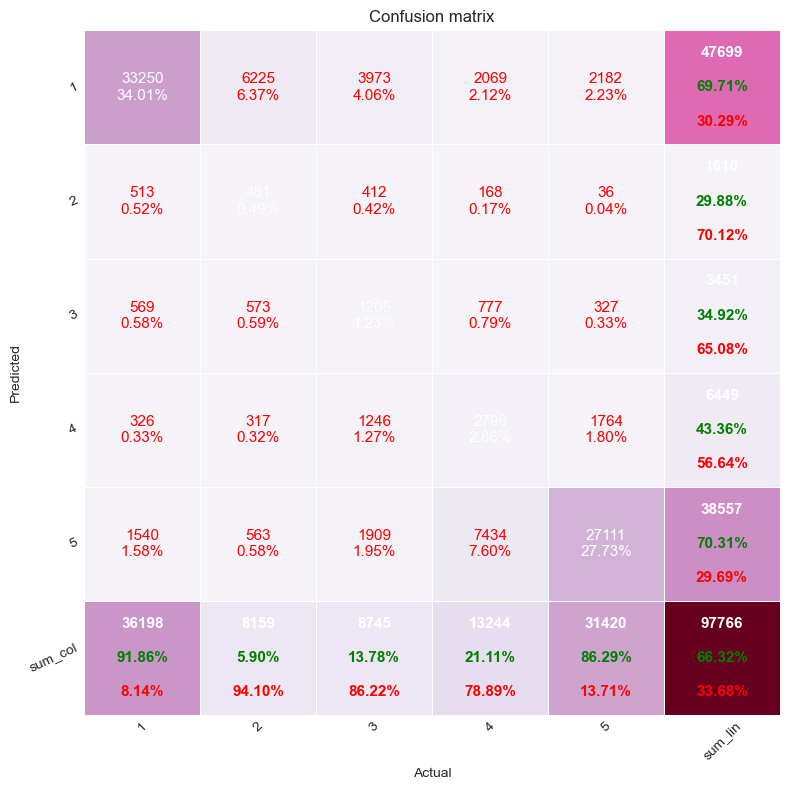

In [12]:
cmap = 'PuRd'
pp_matrix(df_cm, cmap=cmap)